In [181]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import gridspec
import pandas as pd

In [182]:
with open('pulse.RM116.zoom.paprof', newline='') as fil: 
    read = csv.reader(fil, delimiter=' ')
    x = []
    r3 = [] 
    r4 = [] 
    r5 = [] 
    r6 = []
    pa = []
    paerr = []
    for row in read: 
        x.append(row[2])
        r3.append(row[3]) 
        r4.append(row[4])
        r5.append(row[5])
        r6.append(row[6])
        pa.append(row[-2]) 
        paerr.append(row[-1])

In [183]:
#nymin = 60
nymin = 52
#nymax = -25
nymax = -12
#nxmin = 175
nxmin = 175
#nxmax = 200
nxmax = 200

(960, 256)


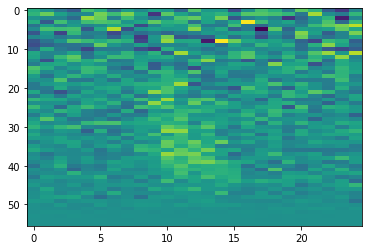

In [184]:
npy = np.load('A_117_dm348.8.tbin256fchn960.fits.npy')
print(npy.shape)
subfac = 8
sub_npy = np.nanmean(npy.reshape(-1, subfac, npy.shape[1]), axis=1)
plt.imshow(sub_npy[nymin:nymax, nxmin:nxmax], interpolation = None, aspect = 'auto')

In [185]:
##GBT A
#bandwidth = 400 #MHz
#centfreq = 800 #MHz
#file_duration = 83.33 #ms
#
#bw = float(bandwidth) #MHz
#cfreq = float(centfreq) #MHz
#
#tres = file_duration / npy.shape[1]
#print('Raw Time Resolution (microsec): ', tres*1e3)
#nchan = npy.shape[0]
#fres = bw / nchan
#print('Raw Frequency Resolution (kHz): ', fres*1e3)
#
##Sub-band data
#subts = sub_npy.sum(0) / np.max(sub_npy.sum(0))
#subsp = sub_npy.sum(1) / np.max(sub_npy.sum(1))
#subchan = nchan / subfac
#subfres = bw / subchan
#print('Sub Frequency Resolution (kHz): ', subfres*1e3)

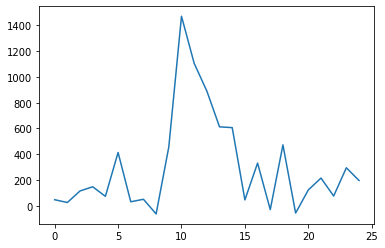

In [186]:
plt.plot(sub_npy[nymin:nymax, nxmin:nxmax].sum(0))

In [187]:
tres = 83.333/npy.shape[1]
fres = 400/npy.shape[0]
sfres = 400/sub_npy.shape[0]

print(tres)
print(fres)
print(sfres)

0.32551953125
0.4166666666666667
3.3333333333333335


In [188]:
x.pop(0)
r3.pop(0)
r4.pop(0)
r5.pop(0)
r6.pop(0)
pa.pop(0)
paerr.pop(0)

x     = [float(i) for i in        x[nxmin:nxmax]]
#r3    = [float(i)*1e3 for i in   r3[nxmin:nxmax]]
r3 = sub_npy[nymin:nymax, nxmin:nxmax].sum(0) * 1e-3
r4    = [float(i)*1e3 for i in   r4[nxmin:nxmax]]
r5    = [float(i)*1e3 for i in   r5[nxmin:nxmax]]
r6    = [float(i)*1e3 for i in   r6[nxmin:nxmax]]
pa    = [float(i) for i in       pa[nxmin:nxmax]]
paerr = [float(i) for i in    paerr[nxmin:nxmax]]

l = []
for i in range(len(r5)):
    l.append(np.sqrt(pow(r4[i],2)+pow(r5[i],2)))

print(r3)
print(l)

[ 0.04685656  0.02510459  0.11493794  0.14722393  0.07326185  0.41357055
  0.0309126   0.05025748 -0.06343787  0.4568175   1.4717472   1.1060802
  0.8907124   0.6126326   0.6067822   0.04539204  0.33128616 -0.03009607
  0.47239807 -0.05672328  0.12270053  0.21496458  0.07537466  0.29500064
  0.1960072 ]
[0.2311853977609228, 0.2154502848436502, 0.12693376408619575, 0.08242843495651243, 0.13185772407367724, 0.3264739172784748, 0.11439991150822627, 0.20514409727798652, 0.18939741971051244, 0.5992366114334554, 1.4051990071093132, 1.0428778110149626, 0.7212747817896062, 0.781839112743434, 0.687881979553179, 0.3863293310764794, 0.20816731647883632, 0.23676119183633115, 0.16951593503491053, 0.15621413926082364, 0.26277284741959167, 0.06788556716187912, 0.061771927342475726, 0.15735408443697926, 0.14063124314447342]


In [189]:
pa_nan = np.asarray([np.nan if x == 0.0 else x for x in pa])
pa_nonan = []
for i in pa:
    if i != 0.0:
        pa_nonan.append(i) 
paerr_nan = np.asarray([np.nan if x == 0.0 else x for x in paerr])
paerr_nonan = []
for i in paerr:
    if i != 0.0:
        paerr_nonan.append(i) 
        
#pa_nonan = np.abs(pa_nonan)
print(pa_nonan)

[87.6902, -86.9629, -88.8112, 89.8166, 89.1983, -81.8414]


In [190]:
paavg = np.average(pa_nonan, weights = [(1/(i**2)) for i in paerr_nonan])
paavg_unc = np.mean(paerr_nonan)

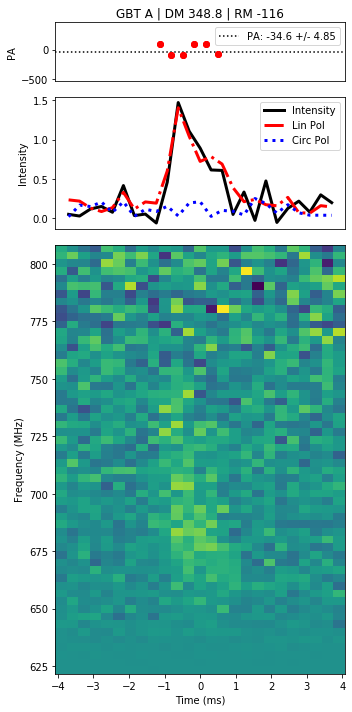

621.6666666666666
808.3333333333333
8.13798828125
186.66666666666669


In [191]:
fig = plt.figure(figsize = (5, 10))
gs = fig.add_gridspec(9, 1)
ax1 = fig.add_subplot(gs[0, 0])
plt.scatter(x, pa_nan, c = 'r', marker = 'o', linewidths = 1)
plt.errorbar(x, pa_nan, yerr=paerr_nan, c = 'r', fmt = 'o', capsize = 3)
paavg_round = str('%s' % float('%.3g' % paavg))
paavg_unc_round = str('%s' % float('%.3g' % paavg_unc))
plt.hlines(paavg, xmin = nxmin, xmax = nxmax, \
           color = 'k', linestyles = 'dotted', \
           label = 'PA: ' + str(paavg_round) + ' +/- ' + str(paavg_unc_round))
plt.xlim(nxmin, nxmax)
plt.ylim(paavg-500, paavg+500)
plt.ylabel('PA')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.title('GBT A | DM 348.8 | RM -116')
plt.legend()
ax2 = fig.add_subplot(gs[1:3, 0])
plt.plot(x, r3, c = 'k', linewidth = 3, label = 'Intensity')
#plt.plot(x, np.abs(r4), linestyle = 'dashed')
#plt.plot(x, np.abs(r5), linestyle = 'dashdot')
plt.plot(x, np.abs(l), c = 'r', linewidth = 3, linestyle = 'dashdot', label = 'Lin Pol')
plt.plot(x, np.abs(r6), c = 'b', linewidth = 3, linestyle = 'dotted', label = 'Circ Pol')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.ylabel('Intensity')
plt.legend()
ax3 = fig.add_subplot(gs[-6:, 0])
twidth = (nxmax - nxmin)*tres
specwidth = (((960//subfac - np.abs(nymax)) - nymin))*sfres
spec_lowbound = nymin*fres + 600#mhz
spec_upbound = spec_lowbound + specwidth
plt.imshow(sub[nymin:nymax, nxmin:nxmax], extent = [-twidth/2, twidth/2, spec_lowbound, spec_upbound]\
           , interpolation = None, aspect = 'auto')
#plt.xticks(tlabellocs, tlabels)
#plt.yticks(flabellocs_c, flabels_c)
plt.xlabel('Time (ms)')
plt.ylabel('Frequency (MHz)')
plt.tight_layout()
plt.show()
fig.savefig('A_rm116_PAfit.png')
print(spec_lowbound)
print(spec_upbound)
print(twidth)
print(specwidth)